# Data-Driven Brand Mastery: EABL's Social Analytics


## Business Overview
Media for brand monitoring to enhance brand perception and customer engagement.
East African Breweries Limited (EABL) is a leading Fast-Moving Consumer Goods (FMCG) company operating in the beverage industry.
EABL's market footprint extends across East Africa, with a significant presence in countries such as Kenya, Uganda, Tanzania, Rwanda, and South Sudan.
With a diverse portfolio of brands such as Tusker Lager, Pilsner Lager, WhiteCap Lager,  Johnnie Walker, Smirnoff, Gilbey's Gin, Richot Brandy, Bond 7 Whiskey and Baileys Irish Cream.
As part of its strategic approach, EABL is keen on leveraging social 

Executive Summary

In the rapidly evolving landscape of social media, businesses are increasingly recognizing the significance of understanding public sentiment towards their brand, products, or industry. Sentiment analysis, particularly using Twitter data, offers a valuable tool for companies to gain actionable insights, enhance customer experience, and make informed business decisions.

##  Problem Statement
EABL recognizes the need to closely monitor and understand the sentiments expressed on social media platforms regarding its brands, products, and marketing initiatives. The company aims to address the following challenges:

#### 1. Brand Perception and Engagement: 

The current state of public sentiment towards EABL on social media is not well-understood, and the company lacks insights to proactively manage and improve its brand perception.

#### 2. Marketing Campaign Effectiveness: 

EABL needs to evaluate the impact of its marketing campaigns and promotions on social media to optimize strategies and refine future campaigns.

#### 3. Customer Feedback Analysis: 

There is a lack of systematic analysis of customer feedback related to product quality, packaging, pricing, and overall satisfaction. EABL aims to utilize this feedback for continuous product improvement and innovation.

## Objectives

### Main Objectives

#### Enhance Brand Perception and Customer Engagement:

The main objective of our project is to monitor and analyze social media conversations to understand public sentiment towards EABL brands.
Identifying areas for improvement and take proactive measures to enhance overall brand perception.

### Specific Objectives

#### Brand Sentiment Analysis:

Analyze sentiments expressed by consumers regarding EABL products, marketing campaigns, and brand image.

Categorize sentiments as positive, negative, or neutral to derive actionable insights.

#### Campaign Effectiveness:

Evaluate the effectiveness of marketing campaigns and promotions through public reactions on social media.

Measure key performance indicators (KPIs) such as engagement rates, reach, and sentiment shift during and after campaigns.

#### Customer Feedback Analysis:

Capture and analyze customer feedback on specific EABL products.

Extract insights on taste, packaging, pricing, and overall satisfaction to guide product development and enhancement.

######  Success Criteria

The success of this project will be measured by:

1. A notable improvement in overall brand sentiment scores over a defined period.

2. Positive shifts in sentiment during and after key marketing campaigns.

3. Tangible product improvements based on customer feedback.

4. Enhanced online visibility and engagement compared to competitors.

Stakeholders
Marketing Team:

Benefit from insights to optimize marketing strategies and refine campaigns.
Product Development Team:

Utilize feedback for continuous product improvement and innovation.
Executive Leadership:

Receive regular reports on brand health and public perception for strategic decision-making. Objectives


## Stakeholders

#### 1. Marketing Team:

Benefit from insights to optimize marketing strategies and refine campaigns.

#### 2. Product Development Team:

Utilize feedback for continuous product improvement and innovation.

#### 3. Executive Leadership:

Receive regular reports on brand health and public perception for strategic decision-making. 

## Data Understanding

#### 1. Brand Mentions:

Social media posts, comments, and mentions related to EABL and its brands.

Data sources: Twitter, Facebook, Instagram (Likes, shares, comments, EABL relevant hashtags.)


#### Product Feedback:

Comments and discussions regarding specific EABL products.

#### Data sources: 

Social media platforms, review sites, online forums.

Data on taste, packaging, pricing, and overall satisfaction.

#### Campaign Reactions:

Public reactions to EABL's marketing campaigns and promotions.

Data sources: Social media platforms.

#### Event Participation:

Social media mentions related to EABL-sponsored events and promotions.

#### Customer Service Interactions:

Social media interactions with EABL's official customer service handles.

In [5]:
!pip install pillow
!pip install squarify
!pip install neattext


     ------------------------------------ 114.7/114.7 kB 167.2 kB/s eta 0:00:00


## Importing Libraries 

In [7]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #plotting statistical graphs
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import squarify
from collections import Counter

# Load the Text Cleaning Package
import neattext.functions as nfx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm ##new progress bars repeatedly
import os
import nltk ##building Python programs to work with human language data
#import spacy #for training the NER model tokenize words
#import random
#from spacy.util import compounding
#from spacy.util import minibatch


pd.set_option('max_colwidth', 400)
pd.set_option('use_mathjax', False)


import warnings
warnings.filterwarnings("ignore")

## Importing Datasets

In [8]:
# reading the datasets
Eabl_mentions = pd.read_csv("FinalMentions.CSV")
Eabl_hashtags = pd.read_csv("FinalHashtags.CSV")
Eabl_brands = pd.read_csv("eablProducts.csv")
Google_news = pd.read_csv('FinalGoogleNews.csv')
Chrome_Gin = pd.read_csv("ChromeGin.CSV")

##### MERGING DATAFRAMES

In [9]:
# Combining  the DataFrames vertically to form one df
combined_df = pd.concat([Eabl_mentions, Eabl_hashtags, Eabl_brands, Chrome_Gin], ignore_index=True)
combined_df.head()

,Unnamed: 0,cleaned_text,sentiment,stats,comments,retweets,quotes,likes
0,0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40,1,157
1,1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29,1,194
2,2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122,2,537
3,3,i thought eabl products are unwanted around the mountain,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0,0,0
4,4,NaN,Neutral,"Jan 10, 2024 · 2:39 PM UTC",0,0,0,1


In [10]:
combined_df.to_csv("CombinedFinal.csv")

## 1. DATA CLEANING

In [11]:
print(f"Our Final Combined data has {combined_df.shape[0]} rows & {combined_df.shape[1]} columns.")

Our Final Combined data has 125218 rows & 8 columns.


In [12]:
#dropping the Unnamed: 0 column
combined_df = combined_df.drop('Unnamed: 0',axis=1)
combined_df.head(5)

,cleaned_text,sentiment,stats,comments,retweets,quotes,likes
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40,1,157
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29,1,194
2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122,2,537
3,i thought eabl products are unwanted around the mountain,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0,0,0
4,NaN,Neutral,"Jan 10, 2024 · 2:39 PM UTC",0,0,0,1


In [13]:
combined_df.columns

Index(['cleaned_text', 'sentiment', 'stats', 'comments', 'retweets', 'quotes',
       'likes'],
      dtype='object')

##### 1. Missing values

In [14]:
# Checking for missing values in each column
missing_values = combined_df.isna().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"The {column} column has {count} missing values")

The cleaned_text column has 4724 missing values
The sentiment column has 4 missing values
The stats column has 2 missing values


In [15]:
# Calculating percentage of missing values in each column
missing_percentage = combined_df.isna().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 0]

# A DataFrame with columns and percentage of missing values
missing_table = pd.DataFrame({
    'Columns': missing_percentage.index,
    '% of Missing Values': missing_percentage.values
})
print("Percentage of Missing Values")
missing_table

Percentage of Missing Values


,Columns,% of Missing Values
0,cleaned_text,3.772621
1,sentiment,0.003194
2,stats,0.001597


In [16]:
# Drop rows with NaN values in the 'cleaned_text', 'sentiment','stats columns
combined_df = combined_df.dropna(subset=['cleaned_text','sentiment','stats'])
combined_df.shape

(120490, 7)

#####  2. Duplicates

In [17]:
# checking for dupliacated rows in the df
duplicated_rows = combined_df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 54707 duplicated rows.


In [18]:
# Calculate the percentage of missing values for each column
missing_percentages1 = (combined_df.isnull().sum() / len(combined_df)) * 100

# Print the result
print("Percentage of missing values in each column:")
print(missing_percentages1)

Percentage of missing values in each column:
cleaned_text    0.0
sentiment       0.0
stats           0.0
comments        0.0
retweets        0.0
quotes          0.0
likes           0.0
dtype: float64


In [19]:
#dropping all the duplicates
combined_df = combined_df.drop_duplicates()

In [20]:
duplicated_rows = combined_df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


#####  3. Correcting Data Types

In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65783 entries, 0 to 125217
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  65783 non-null  object
 1   sentiment     65783 non-null  object
 2   stats         65783 non-null  object
 3   comments      65783 non-null  int64 
 4   retweets      65783 non-null  int64 
 5   quotes        65783 non-null  int64 
 6   likes         65783 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 4.0+ MB


#####  4. Outliers

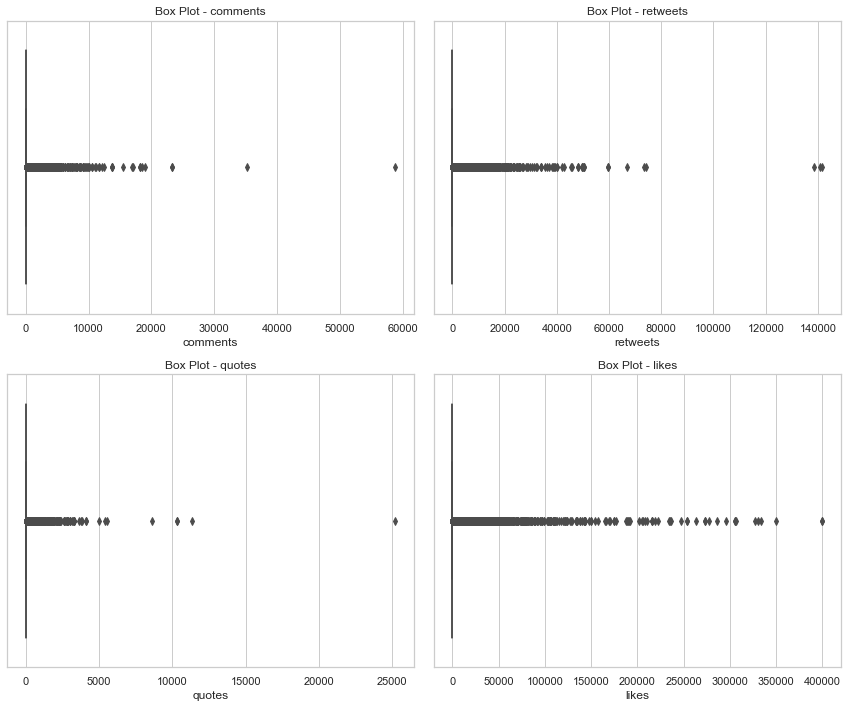

In [22]:
# style for seaborn
sns.set(style="whitegrid")

# columns to check for outliers
columns_to_check = ['comments', 'retweets', 'quotes', 'likes']

# subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(columns_to_check):
    sns.boxplot(x=combined_df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

##### 5. Removing Uncessary Text

In [23]:
def clean_text(text):
    # Removing any unnecessary characters, symbols, or special characters
    cleaned_text = ' '.join(e for e in str(text).split() if (e.isalnum() or e.isspace()))
    # Converting all the text to lowercase
    cleaned_text = cleaned_text.lower()
    # Removing extra whitespaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Applying the cleaning function to the 'cleaned_text' column
combined_df['cleaned_text'] = combined_df['cleaned_text'].apply(clean_text)

## 2. FEATURE ENGINEERING

In [24]:
combined_df.head(5)

,cleaned_text,sentiment,stats,comments,retweets,quotes,likes
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,"Jan 7, 2024 · 4:59 AM UTC",14,40,1,157
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,"Jan 9, 2024 · 5:13 PM UTC",18,29,1,194
2,kenyans wakitambua hii beer it is over for eabl,Neutral,"Jan 9, 2024 · 1:45 PM UTC",33,122,2,537
3,i thought eabl products are unwanted around the mountain,Neutral,"Jan 10, 2024 · 2:43 PM UTC",0,0,0,0
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,Neutral,"Jan 10, 2024 · 10:12 AM UTC",1,0,0,0


##### 1. Length of the text

In [25]:
# Calculating  the number of words in the 'cleaned_text' column
combined_df['text_length_words'] = combined_df['cleaned_text'].apply(lambda x: len(str(x).split()))

combined_df[['cleaned_text', 'text_length_words']].head()

,cleaned_text,text_length_words
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,45
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,28
2,kenyans wakitambua hii beer it is over for eabl,9
3,i thought eabl products are unwanted around the mountain,9
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,19


In [26]:
print(f"The Maximum number of words is {combined_df['text_length_words'].max()} & The Minimum number of words is {combined_df['text_length_words'].min()}")

The Maximum number of words is 879 & The Minimum number of words is 0


##### 2. Datetime Features

In [27]:
# Converting 'stats' column to datetime format
combined_df['stats'] = pd.to_datetime(combined_df['stats'], format='%b %d, %Y · %I:%M %p UTC', errors='coerce')

# Extracting datetime features
combined_df['day'] = combined_df['stats'].dt.day
combined_df['month'] = combined_df['stats'].dt.month
combined_df['year'] = combined_df['stats'].dt.year
combined_df['hour'] = combined_df['stats'].dt.hour
combined_df['day_of_week'] = combined_df['stats'].dt.dayofweek

combined_df[['stats', 'day', 'month', 'year', 'hour','day_of_week']].head()


,stats,day,month,year,hour,day_of_week
0,2024-01-07 04:59:00,7.0,1.0,2024.0,4.0,6.0
1,2024-01-09 17:13:00,9.0,1.0,2024.0,17.0,1.0
2,2024-01-09 13:45:00,9.0,1.0,2024.0,13.0,1.0
3,2024-01-10 14:43:00,10.0,1.0,2024.0,14.0,2.0
6,2024-01-10 10:12:00,10.0,1.0,2024.0,10.0,2.0


In [28]:
# Converting 'day_of_week' to text
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
combined_df['day_of_week_text'] = combined_df['day_of_week'].map(day_of_week_mapping)

# Converting 'month' to text
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
combined_df['month_text'] = combined_df['month'].map(month_mapping)

combined_df[['stats', 'day', 'month', 'year', 'hour','day_of_week_text', 'month_text']].head()

,stats,day,month,year,hour,day_of_week_text,month_text
0,2024-01-07 04:59:00,7.0,1.0,2024.0,4.0,Sunday,January
1,2024-01-09 17:13:00,9.0,1.0,2024.0,17.0,Tuesday,January
2,2024-01-09 13:45:00,9.0,1.0,2024.0,13.0,Tuesday,January
3,2024-01-10 14:43:00,10.0,1.0,2024.0,14.0,Wednesday,January
6,2024-01-10 10:12:00,10.0,1.0,2024.0,10.0,Wednesday,January


##### 3. Total Engagement

In [29]:
# calculating the total number of engagement in each post
combined_df['total_engagement'] = combined_df['comments'] + combined_df['retweets'] + combined_df['quotes'] + combined_df['likes']

In [30]:
# # Define the keywords
#keywords = ['Chrome', 'Oktoberfest', 'Gilbeys', 'Tusker',]

# # Create columns for each keyword
#for keyword in keywords:
    #combined_df[f'mentions_{keyword.lower()}'] = combined_df['cleaned_text'].str.contains(keyword, case=False)

# # Convert the boolean values to 1 for True and 0 for False
#for keyword in keywords:
    #combined_df[f'mentions_{keyword.lower()}'] = combined_df[f'mentions_{keyword.lower()}'].astype(int)

##### 4. Total Engagement

In [31]:
# A function to classify weekdays and weekends
def classify_weekday_weekend(day_of_week):
    if day_of_week < 5:  # Monday to Friday (0 to 4)
        return 'Weekday'
    else:  # Saturday and Sunday (5 and 6)
        return 'Weekend'

# Apply the function to create a new 'weekday_or_weekend' column
combined_df['weekday_or_weekend'] = combined_df['day_of_week'].apply(classify_weekday_weekend)

In [32]:
combined_df.columns

Index(['cleaned_text', 'sentiment', 'stats', 'comments', 'retweets', 'quotes',
       'likes', 'text_length_words', 'day', 'month', 'year', 'hour',
       'day_of_week', 'day_of_week_text', 'month_text', 'total_engagement',
       'weekday_or_weekend'],
      dtype='object')

In [33]:
#dropping irrelevant columns
combined_df = combined_df.drop(['stats','day_of_week','month'],axis=1)

In [34]:
# Renaming the columns
combined_df = combined_df.rename(columns={
    'cleaned_text': 'text',
    'text_length_words': 'length',
    'day': 'day(month)',
    'day_of_week_text': 'day(week)',
    'month_text': 'month',
    'weekday_or_weekend': 'weekday/end'
})

# Display the DataFrame with the renamed columns
combined_df.head()

,text,sentiment,comments,retweets,quotes,likes,length,day(month),year,hour,day(week),month,total_engagement,weekday/end
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,Negative,14,40,1,157,45,7.0,2024.0,4.0,Sunday,January,212,Weekend
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,Positive,18,29,1,194,28,9.0,2024.0,17.0,Tuesday,January,242,Weekday
2,kenyans wakitambua hii beer it is over for eabl,Neutral,33,122,2,537,9,9.0,2024.0,13.0,Tuesday,January,694,Weekday
3,i thought eabl products are unwanted around the mountain,Neutral,0,0,0,0,9,10.0,2024.0,14.0,Wednesday,January,0,Weekday
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,Neutral,1,0,0,0,19,10.0,2024.0,10.0,Wednesday,January,1,Weekday


In [35]:
!pip install squarify
!pip install neattext
!pip install wordcloud

# Data preprocessing

Before conducting sentiment analysis, it is imperative to follow these essential steps: eliminating stop words, removing tags, URL links, and other extraneous words, tokenizing the text, and lemmatizing words.

In [36]:
#clean tweets
#Glance at data
combined_df['text'][:20]

0                guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there
1                                                                                            drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl
2                                                                                                                                                                                                                               kenyans wakitambua hii beer it is over for eabl
3                                                                                                                                                                                       

# Checking for tweet Length Consistency

In [37]:
combined_df['text'].apply(len).value_counts()

text
7       920
14      713
15      671
10      669
26      617
       ... 
485       1
680       1
1384      1
818       1
1214      1
Name: count, Length: 654, dtype: int64

This gives an overview of the number of words per tweet. We also notice that some consist of less than five words therefore won't be instrumental in constructing our predictive model.

In [38]:
sum(combined_df['text'].apply(len) > 5) , sum(combined_df['text'].apply(len) <= 5)

(64260, 1523)

We note tht there are 64260 tweets with characters greater than 5 and  1523 tweets with characters less than 5 characters.

In [39]:
print("Shape of the dataset before filtering:")
print(combined_df.shape)
print("*"*40)
combined_df = combined_df[combined_df['text'].apply(len) > 5]
print("Shape of the dataset after filtering:")
print(combined_df.shape)

Shape of the dataset before filtering:
(65783, 14)
****************************************
Shape of the dataset after filtering:
(64260, 14)


# Checking for Duplicates in the dataset

In [40]:
print(combined_df.duplicated().sum())


775


We want to investigate if indeed these are duplicate values.

In [41]:
# checking if the duolicate values are indeed duplicates
combined_df[combined_df.duplicated(subset=['text'],keep=False)].sort_values(by='text').sample(10)

,text,sentiment,comments,retweets,quotes,likes,length,day(month),year,hour,day(week),month,total_engagement,weekday/end
48136,gilbeys,neutral,0,0,0,2,1,20.0,2022.0,19.0,Saturday,August,2,Weekend
16125,linus for belllagerceo,neutral,0,0,0,1,3,21.0,2023.0,6.0,Wednesday,June,1,Weekday
27098,congratulations,positive,0,0,0,4,1,4.0,2021.0,17.0,Thursday,November,4,Weekday
8093,ad buy 1 350ml gilbeys mixed berries on and get 1 ticket buy 1 750ml gilbeys mixed berries on the barkecom and get 2 tickets buy 2 750ml gilbeys mixed berries on the barkecomand get squad tickets 5 pax mixedandmatched opengoodtimes,Neutral,1,0,0,2,41,27.0,2023.0,12.0,Friday,January,3,Weekday
56010,bet you cant do this not sure you would even want to shes canadian and hit 441 decibels setting a new guinness world record,positive,0,0,0,0,24,11.0,2024.0,18.0,Thursday,January,0,Weekday
43440,ad buy 1 350ml gilbeys mixed berries on kethebarcom and get 1 ticket to the pinknic at the absa grounds on the 28th of january 2023 3pm till late buy 2 750ml gilbey and get 5pax squad tickets mixedandmatched opengoodtimes dj piera makena more will be,neutral,0,0,0,0,46,24.0,2023.0,13.0,Tuesday,January,0,Weekday
41449,gilbeys mzinga,neutral,1,0,0,0,2,14.0,2023.0,13.0,Friday,April,1,Weekday
13793,son of farida,neutral,0,0,0,1,3,18.0,2023.0,15.0,Friday,August,1,Weekday
46041,gilbeys ni wewe,neutral,3,5,0,11,3,28.0,2022.0,15.0,Friday,October,19,Weekday
8503,ad on 28th jan 2023 kutawaka morefire with gilbeys mixed perry pinknic at the absa grounds grab ur tickets via kethebarcom buy 1 750ml gilbeys mixed berries and get 2 tickets or 2 750ml get squad tickets 5 people mixedandmatched opengoodtimes,Neutral,0,2,0,3,41,24.0,2023.0,13.0,Tuesday,January,5,Weekday


From the output displyed, it is not evident if there are duplicated tweets. We chose to retain the duplicates. 

We will now got to preprocessing procedures which include tokenizing(spliting),stemming and lemmatization which are dependent on the model you choose to use.

For cleaning our text we are gling to use the NeatText Library. NeatText is a simple NLP package for cleaning textual data and text preprocessing. It offers a variety of features for cleaning unstructured text data, reducing noise (such as special characters and stopwords), and extracting specific information from the text. It can be used via an object-oriented approach or a functional/method-oriented approach, providing flexibility in its usage. The package includes classes such as TextCleaner, TextExtractor, and TextMetrics for different text processing tasks.

In [42]:
# load the text cleaning packages

import neattext as nt
import neattext.functions as nfx

# Methods and Attributes of the function
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [43]:
# Scaning the Noise
combined_df['text'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0          5.905512
1          3.370787
2          8.510638
3          7.142857
6          0.833333
            ...    
125213    10.606061
125214    11.718750
125215    11.111111
125216     0.000000
125217     0.000000
Name: text, Length: 64260, dtype: float64

In [44]:
# Ensure all entries in 'tweet' column are strings
combined_df['text'] = combined_df['text'].astype(str)

# Now apply the clean_text function
combined_df['clean_text'] = combined_df['text'].apply(lambda x: nfx.clean_text(x, puncts=False, stopwords=False))

In [45]:
combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer it is over for eabl
3,i thought eabl products are unwanted around the mountain,i thought eabl products are unwanted around the mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


# Special Characters

In [46]:
# Remove special characters

combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_special_characters)

combined_df[['text', 'clean_text']].sample(5)

,text,clean_text
25587,akaliba akkendo okalabila kumukondda,akaliba akkendo okalabila kumukondda
4784,matchday 33 eabl ruaraka grounds batotobamungu tunachapamtu,matchday 33 eabl ruaraka grounds batotobamungu tunachapamtu
58935,experience the maneuverability easy handling and sportiness of the bmw g 310 r and surpass yourself with it every single day makelifearide for more information call us 91 80 4343 7676 whats app91 7026767676 tuskerbmwmotorrad theworldofmotorcycling tusker bangalore,experience the maneuverability easy handling and sportiness of the bmw g 310 r and surpass yourself with it every single day makelifearide for more information call us 91 80 4343 7676 whats app91 7026767676 tuskerbmwmotorrad theworldofmotorcycling tusker bangalore
41560,gilbeys offer bado inaendelea hapa volume vip clubsonko wa masonko wote duniani ako area twendeniclubvolume,gilbeys offer bado inaendelea hapa volume vip clubsonko wa masonko wote duniani ako area twendeniclubvolume
2826,if you see an established company like eabl struggling in this economy you should be worried the business environment is punitive and most entities will close down or relocate the revenue streams will be affected finally wambui is weeping over taxes too,if you see an established company like eabl struggling in this economy you should be worried the business environment is punitive and most entities will close down or relocate the revenue streams will be affected finally wambui is weeping over taxes too


In [47]:
# Remove whitespaces
combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_multiple_spaces)

combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer it is over for eabl
3,i thought eabl products are unwanted around the mountain,i thought eabl products are unwanted around the mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


In [48]:
# Remove emojis
combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_emojis)

combined_df[['text', 'clean_text']].sample(5)

,text,clean_text
46329,walai men are focused hapa nje banaaa am in a club of single niggas but theyre so destined to get that bag and legacy asf ladies continue setting those standards na tuna chasiwa hapa kama gilbeys gin,walai men are focused hapa nje banaaa am in a club of single niggas but theyre so destined to get that bag and legacy asf ladies continue setting those standards na tuna chasiwa hapa kama gilbeys gin
48499,huyu dem amekuja shop kununua mafuta ya kujibaka inaitwa gilbeys,huyu dem amekuja shop kununua mafuta ya kujibaka inaitwa gilbeys
46163,kwani hujui gilbeys ww,kwani hujui gilbeys ww
7159,hawa wanakuletea hadi raw materials sasa mimi ni nani nisifurahie oktobafest welivefortaste ydxexperiences,hawa wanakuletea hadi raw materials sasa mimi ni nani nisifurahie oktobafest welivefortaste ydxexperiences
15701,mbu today you dont want to smile,mbu today you dont want to smile


# Contractions

Contractions in a tweet refer to shortened forms of words or phrases that are created by combining two words and replacing one or more letters with an apostrophe. Contractions are commonly used in informal writing, including tweets, to save space and make the text more conversational.

In [50]:
!pip install contractions

In [55]:
import contractions

# Apply the contractions.fix function to the clean_tweet column
combined_df['clean_text'] = combined_df['clean_text'].apply(contractions.fix)

combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer eabl
3,i thought eabl products are unwanted around the mountain,thought eabl products unwanted mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


In [56]:
# Extract stopwords
combined_df['clean_text'].apply(lambda x: nt.TextExtractor(x).extract_stopwords())

0         []
1         []
2         []
3         []
6         []
          ..
125213    []
125214    []
125215    []
125216    []
125217    []
Name: clean_text, Length: 64260, dtype: object

In [57]:
# Removing the stop words

combined_df['clean_text'] = combined_df['clean_text'].apply(nfx.remove_stopwords)

combined_df[['text', 'clean_text']].head()

,text,clean_text
0,guys do you remember shaffie weru dj joe mfalmeneville musya was fired from home boys radio coz they warned ladies about what happened to starlet wahu pastor kanyari sizeabl got mad coz of the same if ladies listened likes of john matara couldnt be there,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara
1,drilling water at kenneth matiba hospital makenji kandara gatanga near kenol kabati towns a free donation by eabl after the muranga county eabl partnership on sorghum thanks eabl,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl
2,kenyans wakitambua hii beer it is over for eabl,kenyans wakitambua hii beer eabl
3,i thought eabl products are unwanted around the mountain,thought eabl products unwanted mountain
6,unajua sai amafanya eabl anaweza tupea a years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana


In [58]:
# Noise Scan after text cleaning
combined_df['clean_text'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise'])

0         0
1         0
2         0
3         0
6         0
         ..
125213    0
125214    0
125215    0
125216    0
125217    0
Name: clean_text, Length: 64260, dtype: int64

# Language Processing (Clean Text)

This involves Tokenization, Stemming / Lemmatization, Parts of Speech Tagging and Calculating Sentiment Based on Polarity & Subjectivity.

In [59]:
test_sample = combined_df['clean_text'].loc[500]

test_sample

'eabl paid courtesy council governors discuss sector trade counties concerns hinder overall safety revenue performance continue engage aim adding value objectives'

In [60]:
from nltk.tokenize import RegexpTokenizer

basic_token_pattern = r"(?u)\b\w\w+\b"

tokenizer = RegexpTokenizer(basic_token_pattern)

tokenizer.tokenize(test_sample)

['eabl',
 'paid',
 'courtesy',
 'council',
 'governors',
 'discuss',
 'sector',
 'trade',
 'counties',
 'concerns',
 'hinder',
 'overall',
 'safety',
 'revenue',
 'performance',
 'continue',
 'engage',
 'aim',
 'adding',
 'value',
 'objectives']

In [61]:
# Tokenise the clean_tweet column
combined_df['preprocessed_text'] = combined_df['clean_text'].apply(lambda x: tokenizer.tokenize(x))

In [62]:
combined_df.iloc[100]["preprocessed_text"][:20]

['soon',
 'start',
 'selling',
 'water',
 'instead',
 'bear',
 'new',
 'lager',
 'flat',
 'hell',
 'unakunywa',
 'na',
 'haishiki',
 'hata']

In [63]:
combined_df[['clean_text', 'preprocessed_text']].iloc[100]

clean_text                          soon start selling water instead bear new lager flat hell unakunywa na haishiki hata
preprocessed_text    [soon, start, selling, water, instead, bear, new, lager, flat, hell, unakunywa, na, haishiki, hata]
Name: 111, dtype: object

# Lemmatization
Lemmatization is a linguistic processing technique that involves reducing words to their base or root form, known as the lemma.The purpose of lemmatization is to standardize and simplify words, considering different inflections or variations of a word as a single base form. This aids in tasks such as text analysis, natural language processing, and information retrieval by treating related forms of a word as identical

In [64]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
# Define a function to lemmatise the tokens
def lemmatise_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [66]:
# Lemmatise the tokens
combined_df['lemma_preprocessed_text'] = combined_df['preprocessed_text'].apply(lambda x: lemmatise_tokens(x))
combined_df[['clean_text', 'lemma_preprocessed_text']].iloc[400]

clean_text                                   tyrece lacey daniel nwauzu return eabl players week regular stars turned big way teams game week eabl campaign week nines players week
lemma_preprocessed_text    [tyrece, lacey, daniel, nwauzu, return, eabl, player, week, regular, star, turned, big, way, team, game, week, eabl, campaign, week, nine, player, week]
Name: 450, dtype: object

In [67]:
# Defining a function to stem the tokens
def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens
# Stemming the tokens
combined_df['stemma_preprocessed_text'] = combined_df['preprocessed_text'].apply(lambda x: stem_tokens(x))

combined_df[['clean_text', 'stemma_preprocessed_text']].iloc[800]

clean_text                                  walai sijapitia site yao hujua wao ni senator keg solo eabl ndio nimepitia products zao utaona drink fraction
stemma_preprocessed_text    [walai, sijapitia, site, yao, hujua, wao, ni, senat, keg, solo, eabl, ndio, nimepitia, product, zao, utaona, drink, fraction]
Name: 864, dtype: object

# Calculatition of Sentiments Based on Polarity & Subjectivity
TextBlob is a Python library used for processing textual data, including sentiment analysis. It uses natural language processing (NLP) and the Natural Language Toolkit (NLTK) to achieve this task. When a sentence is passed into TextBlob, it returns two outputs: polarity and subjectivity. The polarity score is a float within the range [-1, 1], where -1 indicates a negative sentiment and 1 indicates a positive sentiment. The subjectivity score is a float within the range, where 0 is very objective and 1 is very subjective.

In [69]:
!pip install textblob

     ------------------------------------ 636.8/636.8 kB 527.4 kB/s eta 0:00:00


In [70]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
combined_df['Subjectivity'] = combined_df['clean_text'].apply(getSubjectivity)
combined_df['Polarity'] = combined_df['clean_text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
combined_df[['clean_text','Subjectivity','Polarity']].head()

,clean_text,Subjectivity,Polarity
0,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara,1.000000,-0.625000
1,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl,0.466667,0.233333
2,kenyans wakitambua hii beer eabl,0.000000,0.000000
3,thought eabl products unwanted mountain,0.000000,0.000000
6,unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,0.000000,0.000000


In [71]:
# Creating a function to compute the negative, positive and nuetral analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
combined_df['sentiment'] = combined_df['Polarity'].apply(getAnalysis)

# Showing the dataframe
combined_df[['clean_text','Subjectivity','Polarity','sentiment']].head()

,clean_text,Subjectivity,Polarity,sentiment
0,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara,1.000000,-0.625000,Negative
1,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl,0.466667,0.233333,Positive
2,kenyans wakitambua hii beer eabl,0.000000,0.000000,Neutral
3,thought eabl products unwanted mountain,0.000000,0.000000,Neutral
6,unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,0.000000,0.000000,Neutral


In [72]:
combined_df['sentiment'].value_counts()

sentiment
Neutral     37427
Positive    20020
Negative     6813
Name: count, dtype: int64

In [73]:
#previewing our processed text
combined_df['preprocessed_text']

0         [guys, remember, shaffie, weru, dj, joe, mfalmeneville, musya, fired, home, boys, radio, coz, warned, ladies, happened, starlet, wahu, pastor, kanyari, sizeabl, got, mad, coz, ladies, listened, likes, john, matara]
1                                           [drilling, water, kenneth, matiba, hospital, makenji, kandara, gatanga, near, kenol, kabati, towns, free, donation, eabl, muranga, county, eabl, partnership, sorghum, thanks, eabl]
2                                                                                                                                                                                         [kenyans, wakitambua, hii, beer, eabl]
3                                                                                                                                                                                  [thought, eabl, products, unwanted, mountain]
6                                                                                      [unajua, sai,

In [74]:
#previewing the processed data
combined_df['lemma_preprocessed_text'] = combined_df['lemma_preprocessed_text'].apply(lambda x: ' '.join(x))

combined_df['stemma_preprocessed_text'] = combined_df['stemma_preprocessed_text'].apply(lambda x: ' '.join(x))

combined_df['preprocessed_text'] = combined_df['preprocessed_text'].apply(lambda x: ' '.join(x))

combined_df['preprocessed_text']


0         guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara
1                                    drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl
2                                                                                                                                                                 kenyans wakitambua hii beer eabl
3                                                                                                                                                          thought eabl products unwanted mountain
6                                                                           unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana
                         

In [75]:
#checking more information of the processed dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64260 entries, 0 to 125217
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   text                      64260 non-null  object 
 1   sentiment                 64260 non-null  object 
 2   comments                  64260 non-null  int64  
 3   retweets                  64260 non-null  int64  
 4   quotes                    64260 non-null  int64  
 5   likes                     64260 non-null  int64  
 6   length                    64260 non-null  int64  
 7   day(month)                63991 non-null  float64
 8   year                      63991 non-null  float64
 9   hour                      63991 non-null  float64
 10  day(week)                 63991 non-null  object 
 11  month                     63991 non-null  object 
 12  total_engagement          64260 non-null  int64  
 13  weekday/end               64260 non-null  object 
 14  clean_text

In [76]:
# save the dataframe to csv using the name 'interim_data.csv' fo the data folder
combined_df.to_csv('Processed_data.csv', index=False)

# Exploratory Data Analysis
Exploratory Data Analysis involves conducting preliminary examinations of data to unveil hidden patterns, validate hypotheses, and pinpoint anomalies. This method empowers us to extract insights from the data that extend beyond the confines of formal modeling or hypothesis testing, providing a comprehensive understanding of the information at hand.

In [77]:
Processed_df = pd.read_csv('Processed_data.csv')

Processed_df.sample()

,text,sentiment,comments,retweets,quotes,likes,length,day(month),year,hour,day(week),month,total_engagement,weekday/end,clean_text,preprocessed_text,lemma_preprocessed_text,stemma_preprocessed_text,Subjectivity,Polarity
40250,ad is organising mixed berry pinknic at absa grounds on 28012023 from 3pm till late dress code is mixedforvibes opengoodtimes all tickets from the barcom are redeemable as follows buy 1 350ml gilbeys mixed berries on kethebarcom,Negative,3,8,2,7,37,24.0,2023.0,11.0,Tuesday,January,20,Weekday,ad organising mixed berry pinknic absa grounds 28012023 3pm till late dress code mixedforvibes opengoodtimes tickets barcom redeemable follows buy 1 350ml gilbeys mixed berries kethebarcom,ad organising mixed berry pinknic absa grounds 28012023 3pm till late dress code mixedforvibes opengoodtimes tickets barcom redeemable follows buy 350ml gilbeys mixed berries kethebarcom,ad organising mixed berry pinknic absa ground 28012023 3pm till late dress code mixedforvibes opengoodtimes ticket barcom redeemable follows buy 350ml gilbeys mixed berry kethebarcom,ad organis mix berri pinknic absa ground 28012023 3pm till late dress code mixedforvib opengoodtim ticket barcom redeem follow buy 350ml gilbey mix berri kethebarcom,0.366667,-0.1


In [78]:
#checking for shape
Processed_df.shape

(64260, 20)

In [79]:
#Checking for missing values
Processed_df.isna().sum()

text                          0
sentiment                     0
comments                      0
retweets                      0
quotes                        0
likes                         0
length                        0
day(month)                  269
year                        269
hour                        269
day(week)                   269
month                       269
total_engagement              0
weekday/end                   0
clean_text                  224
preprocessed_text           230
lemma_preprocessed_text     230
stemma_preprocessed_text    230
Subjectivity                  0
Polarity                      0
dtype: int64

We note that we have some missing values in our dataset. We chose to drop them since we won't be losing a good chunk of data.

In [80]:
# drop the null values
Processed_df.dropna(inplace=True)
Processed_df.isna().sum()

text                        0
sentiment                   0
comments                    0
retweets                    0
quotes                      0
likes                       0
length                      0
day(month)                  0
year                        0
hour                        0
day(week)                   0
month                       0
total_engagement            0
weekday/end                 0
clean_text                  0
preprocessed_text           0
lemma_preprocessed_text     0
stemma_preprocessed_text    0
Subjectivity                0
Polarity                    0
dtype: int64

In [81]:
Processed_df['sentiment'].value_counts()

sentiment
Neutral     37079
Positive    19903
Negative     6779
Name: count, dtype: int64

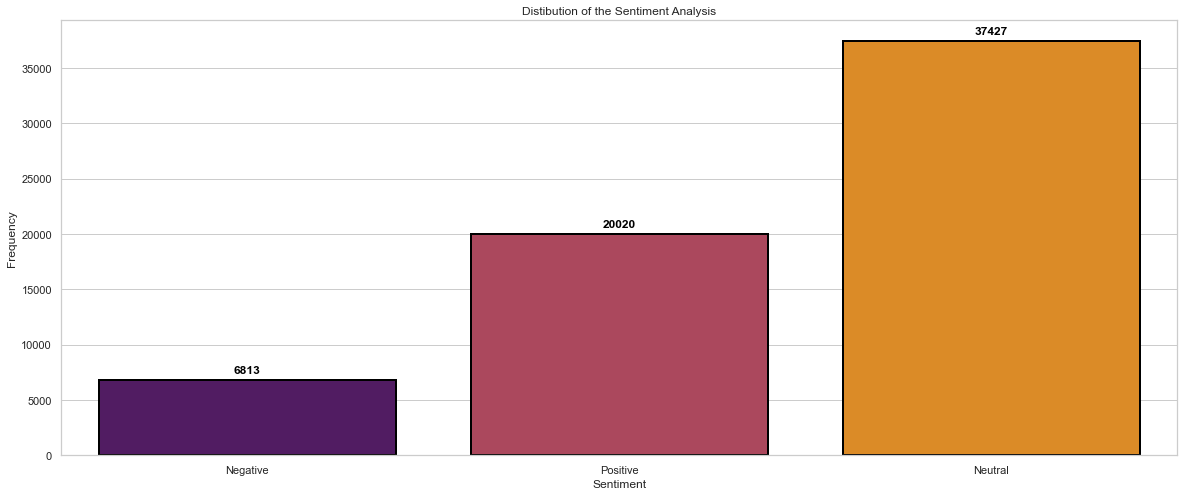

In [82]:
#Distribution of Sentiments
plt.figure(figsize=(20,8))     #width and height
sns.countplot(x='sentiment',data=combined_df, palette = 'inferno', linewidth=2, edgecolor='black')
plt.title("Distibution of the Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to plot
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(), 
                       (p.get_x()+p.get_width()/2., 
                        p.get_height()), ha='center', 
                        va='center', xytext=(0, 10), 
                        textcoords='offset points', 
                        fontsize=12, color='black',
                          weight='bold')

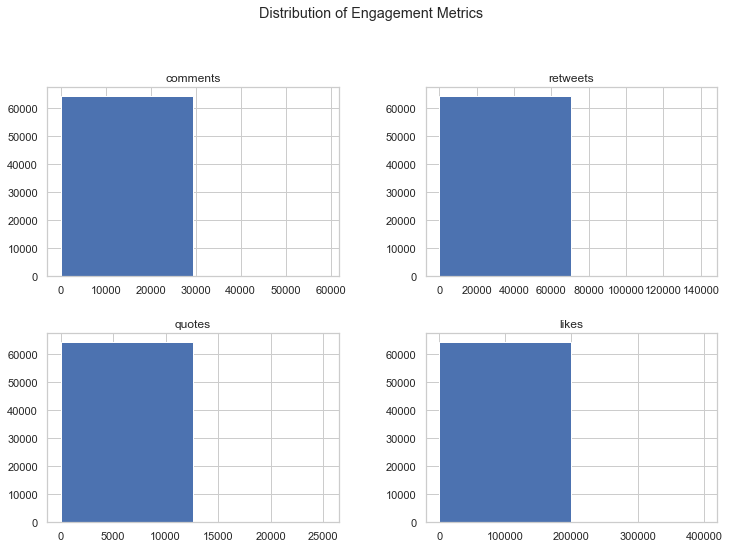

In [83]:
# Checking for Distribution of Engagement
engagement_metrics = ['comments', 'retweets', 'quotes', 'likes']
combined_df[engagement_metrics].hist(figsize=(12, 8), bins=2)
plt.suptitle('Distribution of Engagement Metrics', y=1.02)
plt.show()

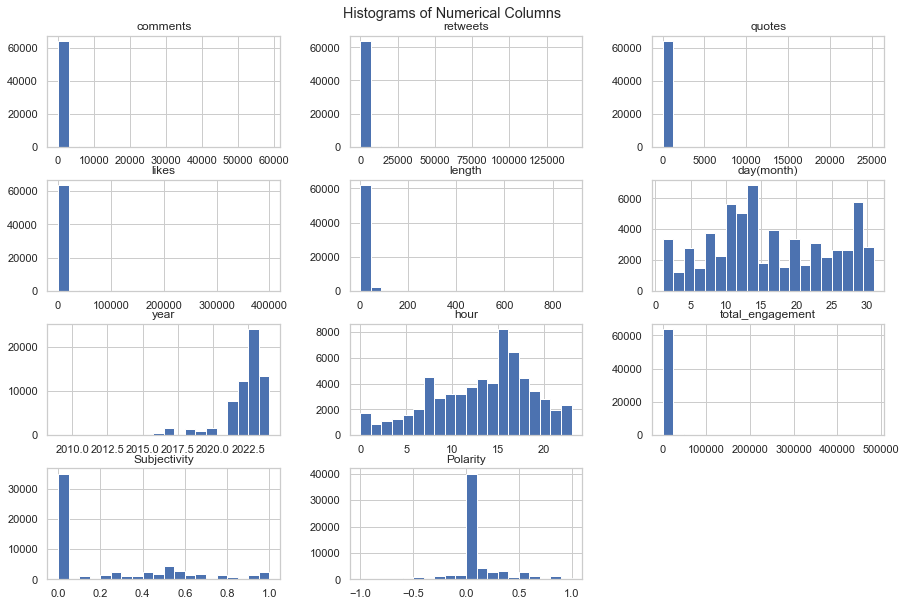

In [84]:
# Distribution of numerical columns
combined_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns', y=0.92)
plt.show()

In [85]:
# Correlation matrix
corr_matrix = combined_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Sunday'

In [102]:
!pip install jinja2 --upgrade

In [101]:
Processed_df['text_temp'] = Processed_df['preprocessed_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in Processed_df['text_temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.2' currently installed).

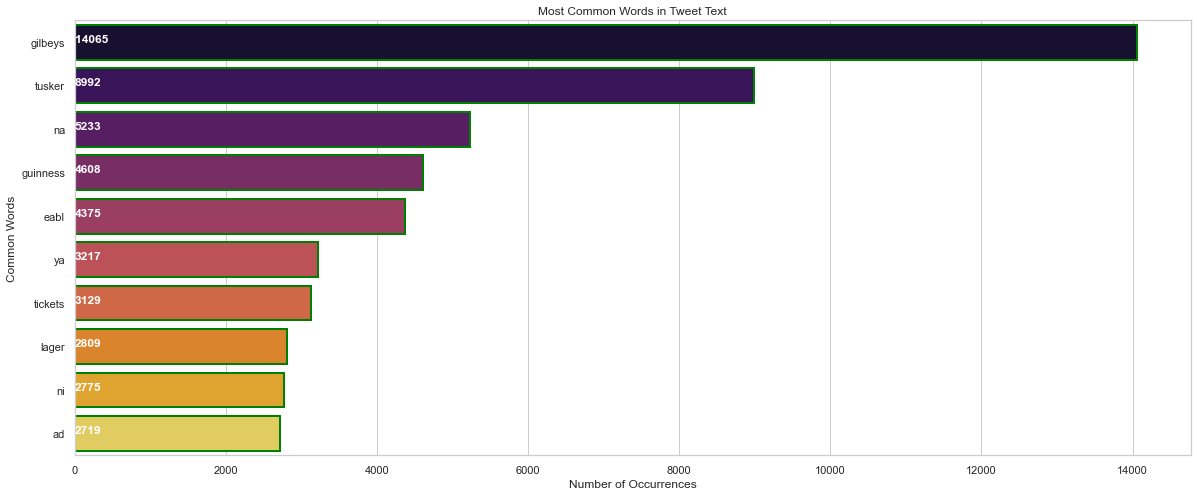

In [87]:
# plotting top 10 most frequent words using seaborn.
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="count",y="Common_words", data=temp, palette="inferno", linewidth=2,edgecolor='green')
plt.title("Most Common Words in Tweet Text")
plt.xlabel("Number of Occurrences")
plt.ylabel("Common Words")

# Addd annotaions for the barplots.
for i,j in enumerate(temp["count"]):
    ax.text(.7,i,j,weight="bold",color="white",fontsize=12)

plt.show()

In [88]:
#Character Counts by Tweet text
def _get_charcounts(x):
    r = x.split()
    b= ''.join(s)
    return len(x)

count    63761.000000
mean       102.710481
std        107.473079
min          6.000000
25%         34.000000
50%         75.000000
75%        153.000000
max       4595.000000
Name: text_len, dtype: float64

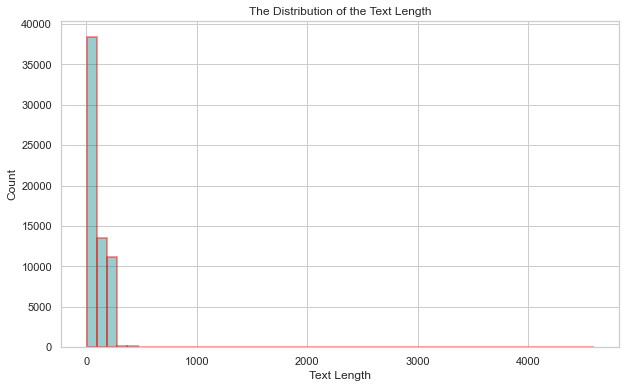

In [89]:
# getting the character length for each tweet
Processed_df['text_len'] = Processed_df['text'].apply(lambda x:len(x))

display(Processed_df['text_len'].describe())

# plotting the distribution of the tweet length
plt.figure(figsize=(10,6))
sns.distplot(Processed_df['text_len'], color='teal',kde=False, hist_kws=dict(edgecolor="red", linewidth=2), bins=50)
plt.title('The Distribution of the Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')

plt.show()

,preprocessed_text,word_counts
11661,backbin style going probably week jahazi pier munyonyo fewdaystogo thelineupisbig realvibes bethere,12
45187,kwani nyinyi mnapata wapi picha za week gilbeys faith cherotich cs matiangi miguna miguna igathe muranga sauti sol kurakwaruto kenyakwanzamegarally,20
45861,eireprintscom irish hurling causeway guinness,5
42202,py capability accomodate chupa ya gilbeys ndio fence juu thick line haitoshi,12
61047,traveller whiskey blend 40 nonage stated 90prf blended whiskey wno age statement imagine love child blantons caribouecrossing 90 proof bit younger appeal crown johnnie walker drinker bourbonworld,27


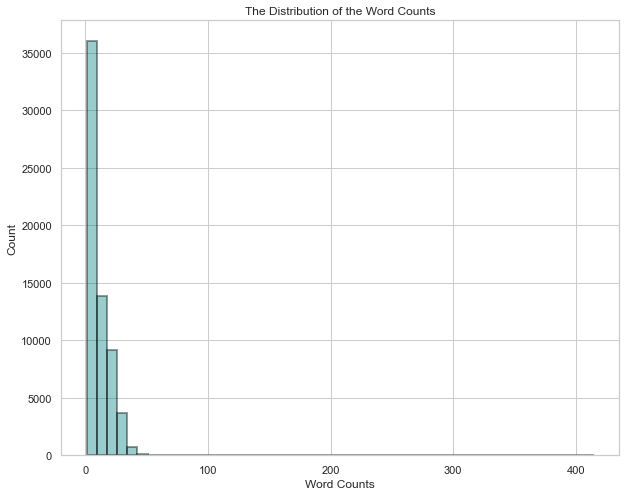

In [90]:
#Word Count by Tweet
def _get_wordcounts(x):
    length = len(str(x).split())
    return length

Processed_df['word_counts'] = Processed_df['preprocessed_text'].apply(lambda x:_get_wordcounts(x))

display(Processed_df[['preprocessed_text','word_counts']].sample(5))

Processed_df['word_counts'].describe()

# plot word_counts
plt.figure(figsize=(10,8))
sns.distplot(Processed_df['word_counts'], color='teal', kde=False, hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('The Distribution of the Word Counts')
plt.xlabel('Word Counts')
plt.ylabel('Count')


plt.show()

The histogram shows that the most common word count is between 20 and 50. The distribution is skewed to the left, meaning that there are more tweets with lower word counts than higher word counts.

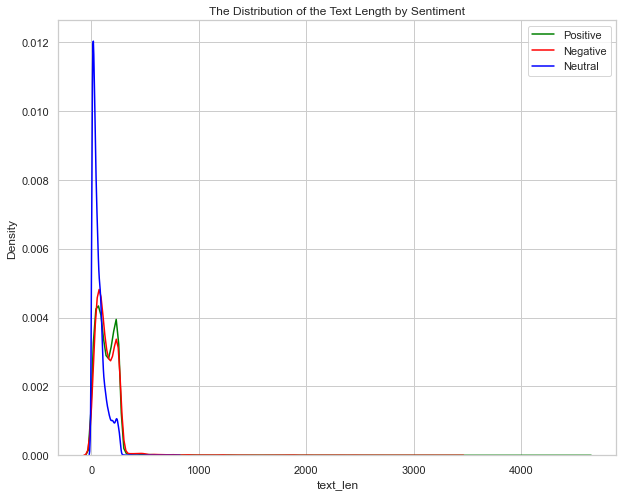

In [91]:
# Character Count by Sentiment
plt.figure(figsize=(10, 8))
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Positive']['text_len'], color='green', label='Positive', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Negative']['text_len'], color='red', label='Negative', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Neutral']['text_len'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Text Length by Sentiment')
plt.legend()

plt.show()

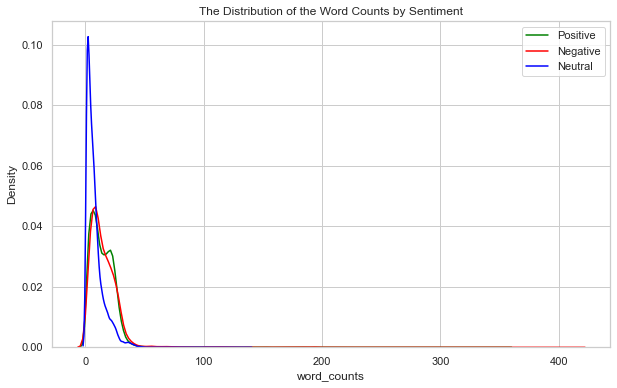

In [92]:
# word_count by sentiment type
plt.figure(figsize=(10, 6))
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Positive']['word_counts'], color='green', label='Positive', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Negative']['word_counts'], color='red', label='Negative', shade=False)
sns.kdeplot(Processed_df[Processed_df['sentiment'] == 'Neutral']['word_counts'], color='blue', label='Neutral', shade=False)
plt.title('The Distribution of the Word Counts by Sentiment')
plt.legend()

plt.show()

# Sentiment Analysis
Distribution of Sentiments

In [93]:
Processed_df['sentiment'].value_counts()

sentiment
Neutral     37079
Positive    19903
Negative     6779
Name: count, dtype: int64

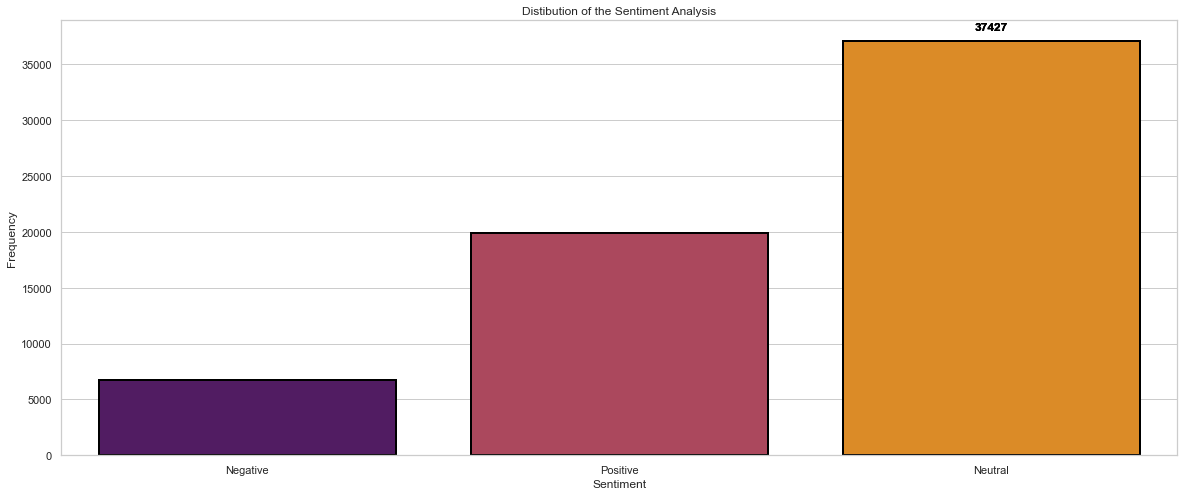

In [94]:
#bargraph plot for sentiment analysis
plt.figure(figsize=(20,8)) #width and height    
sns.countplot(x='sentiment',data=Processed_df, palette = 'inferno', linewidth=2, edgecolor='black')
plt.title("Distibution of the Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Add annotations to plot
for n in plt.gca().patches:
    plt.gca().annotate(p.get_height(), 
                       (p.get_x()+p.get_width()/2., 
                        p.get_height()), ha='center', 
                        va='center', xytext=(0, 10), 
                        textcoords='offset points', 
                        fontsize=12, color='black',
                          weight='bold')


plt.show()

In [95]:
#Positive sentiment analysis
# Most common positive words
Processed_df_pos = Processed_df[Processed_df['sentiment'] == 'Positive']
top = Counter([item for sublist in Processed_df_pos['text_temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.2' currently installed).

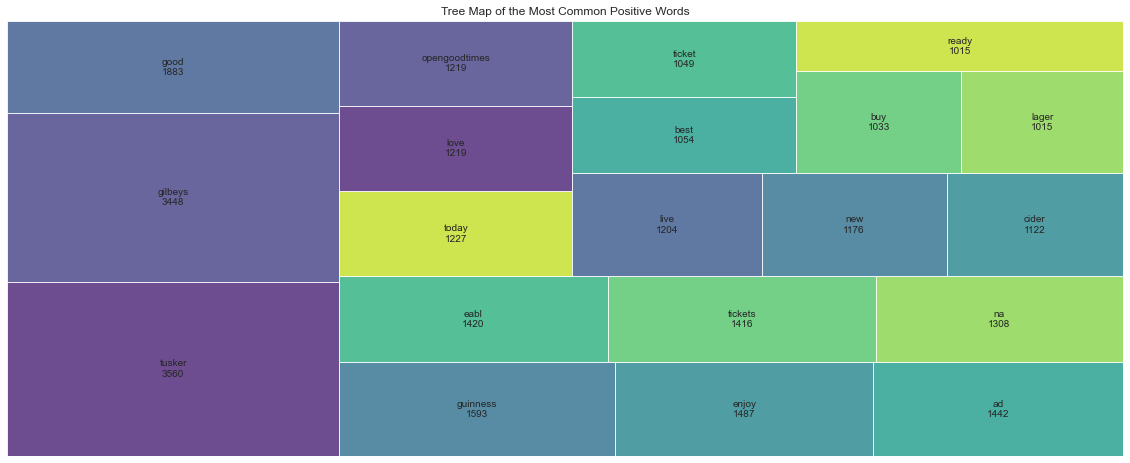

In [96]:
# plotting a tree map to show the positive sentiments
plt.figure(figsize=(20,8))

# Create labels with word counts
label_pos= [f"{word}\n{count}" for word, count in zip(temp_positive['Common_words'], temp_positive['count'])]

# Use a valid colormap name, for example, 'viridis'
squarify.plot(sizes=temp_positive['count'], label=label_pos, alpha=0.8, color=sns.color_palette("viridis", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Positive Words')
plt.axis('off')
plt.show()

In [97]:
# Getting the most positive tweets

y = 1
sortedDF = Processed_df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
positive_tweets = []  # list to store positive tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Positive'):
    positive_tweets.append(sortedDF['text'][i])
    y = y+1

# Convert list to DataFrame
positive_tweets_df = pd.DataFrame(positive_tweets, columns=['Positive Tweets'])

positive_tweets_df

,Positive Tweets
0,kalenjin women are the best as wives fr i am talking about vienyejis si hawa wa gilbeys
1,yooh tufike thorn treekibera tukamate gilbeys remember for any purchase of bucket of beer or spirit you shall be served with a delicious mbuzi beiyajioni courtesy of kumbuka drinkbetternotmore check out to see your
2,gilbeys ndio best quickmart supermarket quickmart offer quickmartcrazyoffers
3,the hennessy too went through the shaking ordeal muratina wine changaa busaa best pilsner jd jw gilbeysyote ni pombe imo
4,try the guinness challenge first sip must perfectly underline guinness cheers
...,...
19898,what do you prefer roasted chicken or goats meat anyway get ready to enjoy your fav bites at roastandrhyme this sunday grab a ticket via roastandrhymecom or dail 291 at just 100k cheerstotheholidays thisishowwedo cc
19899,ad enjoy opengoodtimes at the mixedandmatched pinknic with at absa grounds 28th jan 3pm late dress code mixmatch with a touch of pink tickets 1 350ml gilbeys mixed berries 1 1 750ml 2 2 750ml squad tickets 5 people
19900,ad enjoy opengoodtimes at the mixedandmatched pinknic with at absa grounds 28th jan 3pm late dress code mixmatch with a touch of pink tickets 1 350ml gilbeys mixed berries 1 1 750ml 2 2 750ml squad tickets 5 people
19901,this packaging is so cheap looks horrible eastafricanbreweries pls come up with better packaging or revert back to the old packaging this is not kenya cane class smirnoff eabl vodka


# Negative Sentiment Analysis

In [98]:
# Most Common Negative Words
Processed_df_neg = Processed_df[Processed_df['sentiment'] == 'Negative']
top = Counter([item for sublist in Processed_df_neg['text_temp'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.2' currently installed).

In [ ]:
# plotting a tree map to show the negative sentiments
plt.figure(figsize=(20,8))

# Create labels with word counts
labels_neg = [f"{word}\n{count}" for word, count in zip(temp_negative['Common_words'], temp_negative['count'])]

squarify.plot(sizes=temp_negative['count'], label=labels_neg, alpha=0.8, color=sns.color_palette("Reds", 20), text_kwargs={'fontsize':20})

plt.title('Tree Map of the Most Common Negative Words')
plt.axis('off')

plt.show()

In [103]:
# Getting the most negative tweets

y = 1
sortedDF = Processed_df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
Processed_negative_tweets = []  # list to store negative tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Negative'):
    Processed_negative_tweets.append(sortedDF['clean_text'][i])
    y = y+1

# Convert list to DataFrame
Processed_negative_tweets = pd.DataFrame(Processed_negative_tweets, columns=['Negative Tweets'])

Processed_negative_tweets

,Negative Tweets
0,rare giant tusker elephant killed poachers 25 left wild giant tusker elephant killed poachers dlvritnyxkld
1,artistes remixes drag think saving lame screenshot reason use time wisely stream favs snoozefest album atleast jk 6 individual guinness world records cry harder
2,big things come huge packages tusker casually strolling mara puny landcruiser looks marben saturdaymotivation onerainbow safari safariweek masaimara holiday wild traveldiaries
3,day 1984 rts today tonight broadcast landmark programme aftermath tidey kidnapping programme presented brendan obrien set answer unanswered questions circumstances kidnapping murder recruit garda gary sheehan private patrick kelly derrada wood outside ballinamore kidnappers vastly outnumbered manage shoot way safety escaped socalled ring steel chosen leitrim support county revealed ring steel ...
4,lie meets honest relationship trust lies wrong yes mental issues accept lies living fantasy world
...,...
6774,buying gilbeys 750ml 4500 shillings insane
6775,insane gm tweet starts players accountable roster looks way
6776,gilbeys definitely worst drink waah heri bestchrome
6777,bholaashankar ki 5 ichinappdu shocking ani kakunda pachha manda antha essays raasaaru kada ra cut cheste okkati kuda nijam leni stories rastaru


# Neutral Sentiment Analysis

In [104]:
# Most Common Neutral Words
df_neu = Processed_df[Processed_df['sentiment'] == 'Neutral']
top = Counter([item for sublist in df_neu['text_temp'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')

ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.2' currently installed).

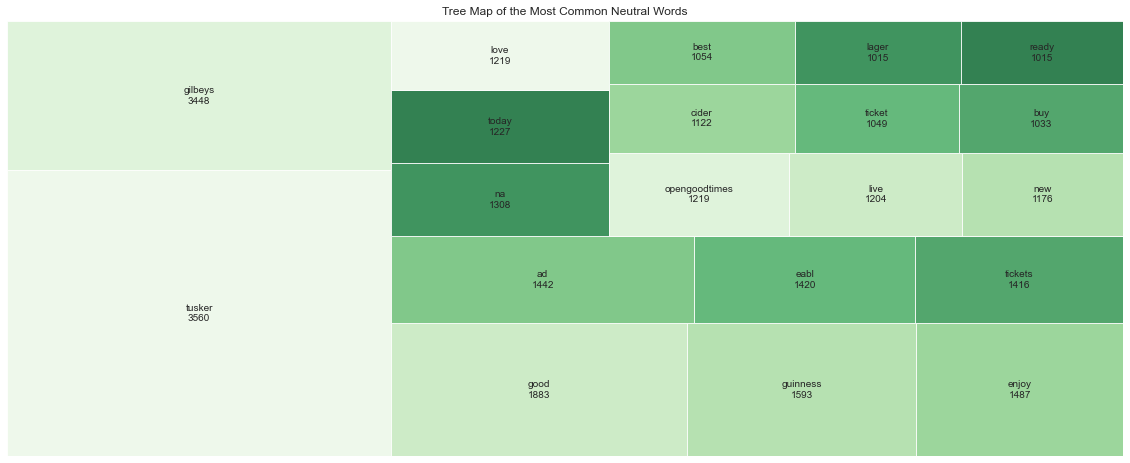

In [105]:
plt.figure(figsize=(20,8))

# Create labels with word counts
word_neu = [f"{word}\n{count}" for word, count in zip(temp_positive['Common_words'], temp_positive['count'])]

squarify.plot(sizes=temp_neutral['count'], label=word_neu, alpha=0.8, color=sns.color_palette("Greens", 10), text_kwargs={'fontsize':10})

plt.title('Tree Map of the Most Common Neutral Words')
plt.axis('off')

plt.show()

In [106]:
# Getting the most Neutral tweets

y = 1
sortedDF = Processed_df.sort_values(by = ['Polarity'], ascending = False).reset_index(drop=True)
Neutral_tweets = []  # list to store Neutral tweets
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['sentiment'][i] == 'Neutral'):
    Neutral_tweets.append(sortedDF['text'][i])
    y = y+1

# Convert list to DataFrame
Neutral_tweets_df = pd.DataFrame(Neutral_tweets, columns=['Neutral Tweets'])

Neutral_tweets_df

,Neutral Tweets
0,gilbeys
1,los niu los nuevos para los que no sepan inglich
2,hurdles gunturkaaram sunc avvatlede
3,bu arada bilen bilir gordonsn olduu yerde gilbeys dezenfektan olarak kullanlr
4,asalu sandhya70 tickets okkataina konnarani kani ila evaro show teeskunnarani ekkadaina chusava least talked topic idi
...,...
37074,ray epps the man who directed people to go into the capitol and privately claimed credit for orchestrating the capitol breach gets one year probation nothing to see here
37075,lets be mutuals
37076,snow plowing is finished up time for a captain morgan and watch the fire burn
37077,2023 nfl fan of the year presented by captain morgan


In [107]:
# save the dataframe to csv using the name 'processed_data.csv'

Final_df = Processed_df[['clean_text', 'preprocessed_text', 'lemma_preprocessed_text', 'stemma_preprocessed_text', 'sentiment']]
Final_df.to_csv('Final_data.csv', index=False)

# Modelling

In sentiment analysis, where the goal is to classify text into different sentiment categories (such as positive, negative, or neutral), several metrics can be used to evaluate the performance of a model. In our case, the metric of success to be used will be the F1 score, precision and recall. 

Precision and recall provide insights into the model's performance in correctly predicting positive instances and capturing all relevant positive instances, respectively. Precision is the ratio of true positives to the sum of true positives and false positives, while recall is the ratio of true positives to the sum of true positives and false negatives. 

Precision emphasizes the quality of positive predictions, while recall emphasizes the completeness of positive predictions

The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is particularly useful when there is an uneven distribution of classes in the dataset.

In [108]:
final_df = pd.read_csv('Final_data.csv')

final_df.head()

,clean_text,preprocessed_text,lemma_preprocessed_text,stemma_preprocessed_text,sentiment
0,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara,guys remember shaffie weru dj joe mfalmeneville musya fired home boys radio coz warned ladies happened starlet wahu pastor kanyari sizeabl got mad coz ladies listened likes john matara,guy remember shaffie weru dj joe mfalmeneville musya fired home boy radio coz warned lady happened starlet wahu pastor kanyari sizeabl got mad coz lady listened like john matara,guy rememb shaffi weru dj joe mfalmenevil musya fire home boy radio coz warn ladi happen starlet wahu pastor kanyari sizeabl got mad coz ladi listen like john matara,Negative
1,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati towns free donation eabl muranga county eabl partnership sorghum thanks eabl,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati town free donation eabl muranga county eabl partnership sorghum thanks eabl,drill water kenneth matiba hospit makenji kandara gatanga near kenol kabati town free donat eabl muranga counti eabl partnership sorghum thank eabl,Positive
2,kenyans wakitambua hii beer eabl,kenyans wakitambua hii beer eabl,kenyan wakitambua hii beer eabl,kenyan wakitambua hii beer eabl,Neutral
3,thought eabl products unwanted mountain,thought eabl products unwanted mountain,thought eabl product unwanted mountain,thought eabl product unwant mountain,Neutral
4,unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea years supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea year supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,unajua sai amafanya eabl anaweza tupea year suppli ya balozi na singleton kama yobra wew unapepeta tutablockiwa bana,Neutral


In [109]:
final_df=final_df[['lemma_preprocessed_text','sentiment']]
final_df.head()

,lemma_preprocessed_text,sentiment
0,guy remember shaffie weru dj joe mfalmeneville musya fired home boy radio coz warned lady happened starlet wahu pastor kanyari sizeabl got mad coz lady listened like john matara,Negative
1,drilling water kenneth matiba hospital makenji kandara gatanga near kenol kabati town free donation eabl muranga county eabl partnership sorghum thanks eabl,Positive
2,kenyan wakitambua hii beer eabl,Neutral
3,thought eabl product unwanted mountain,Neutral
4,unajua sai amafanya eabl anaweza tupea year supply ya balozi na singleton kama yobra wewe unapepeta tutablockiwa bana,Neutral


In [110]:
#creating a function to get all columns of object type
obj_list = final_df.select_dtypes(include = "object").columns
print (obj_list)

Index(['lemma_preprocessed_text', 'sentiment'], dtype='object')


In [111]:
# import train test split and splitting the dataset
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(final_df['lemma_preprocessed_text'],
                                                    final_df['sentiment'],
                                                    test_size=0.2,
                                                    random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51008,), (12753,), (51008,), (12753,))

In [112]:
#using label encode to encode the categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# transforming y_train and y_test
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

le.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [113]:
!pip install xgboost

In [119]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert inputs to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)


# Define XGBoost model parameters
params = {'objective': 'multi:softmax', 'num_class': 3, 'max_depth': 6,
          'eta': 0.3, 'subsample': 0.6, 'colsample_bytree': 0.8}

# Train the XGBoost model
num_rounds = 50
xgb_model = xgb.train(params, dtrain, num_rounds)

# Use the XGBoost model to make predictions on the test set
xgb_pred = xgb_model.predict(dtest)

# Evaluate the performance
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix = confusion_matrix(y_test, xgb_pred)
print(confusion_matrix)
print('--------------------------------------------------------------------------')
print(classification_report(y_test, xgb_pred))
#print('Accuracy of our model is' + ' ' + str(accuracy_score(y_test, xgb_pred)))

[[ 664  615   85]
 [  13 7366   23]
 [  96  905 2986]]
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.49      0.62      1364
           1       0.83      1.00      0.90      7402
           2       0.97      0.75      0.84      3987

    accuracy                           0.86     12753
   macro avg       0.88      0.74      0.79     12753
weighted avg       0.87      0.86      0.86     12753



For class 0, the model has a precision of 0.87, meaning that when it predicts class 0, it is correct 87% of the time. The recall is 0.49, indicating that the model is capturing only 49% of the instances of class 0. The F1-score, which balances precision and recall, is 0.62.

For class 1, the model has a high precision of 0.82, suggesting that when it predicts class 1, it is correct 82% of the time. The recall is very high at 0.99, indicating that the model is capturing almost all instances of class 1. The F1-score is also high at 0.90.

For class 2, the model exhibits a high precision of 0.97, indicating that when it predicts class 2, it is correct 97% of the time. The recall is 0.74, suggesting that the model captures 74% of the instances of class 2. The F1-score is 0.84.

# Second model-Logistic regression

In [115]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

In [116]:
def multiclass_evaluation(y_true, y_pred, X_test, X_train, clf, n_class=3):
    
    #training and test scores
    print(f"Training Score: {round(clf.score(X_train, y_train),2)} \
            Test Score:{round(clf.score(X_test, y_true),2)}")
    
    #Classification report
    print("\n")
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
    
    #Plotting the normalized confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                           display_labels=['Negative', 'Neutral', 'Positive'])
    disp.plot(ax=ax[0], cmap='Greens')
    ax[0].grid(False)  # Remove gridlines
    
    pred_prob = clf.predict_proba(X_test)
    
    #Plotting the ROC curve
    fpr={}
    tpr={}
    thresh={}
    
    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:,i], pos_label=i)
    
    ax[1].plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative vs Rest')
    ax[1].plot(fpr[1], tpr[1], linestyle='--',color='blue', label='Neutral vs Rest')
    ax[1].plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive vs Rest')
    ax[1].set_title('Multiclass ROC curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive rate')
    ax[1].legend(loc='best')
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

Baseline Logistic Regression Model

Training Score: 0.95             Test Score:0.91


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1364
           1       0.90      0.99      0.94      7402
           2       0.95      0.88      0.91      3987

    accuracy                           0.91     12753
   macro avg       0.92      0.83      0.86     12753
weighted avg       0.92      0.91      0.91     12753



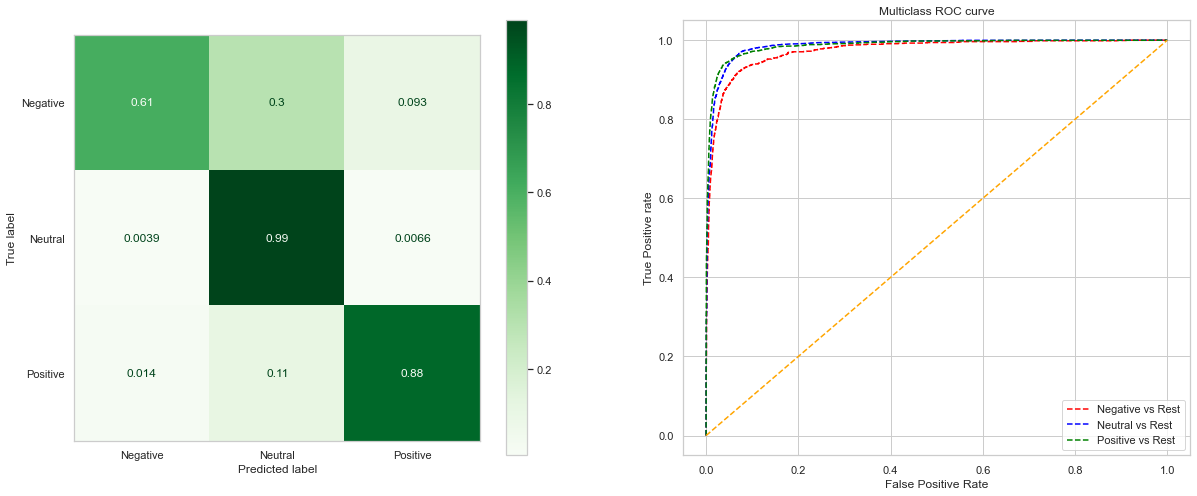

In [117]:
log_base_clf = Pipeline([('vectorizer', TfidfVectorizer()),
                                ('classifier', LogisticRegression())])

log_base_clf.fit(X_train, y_train)

# Making our predictions
y_pred = log_base_clf.predict(X_test)


multiclass_evaluation(y_test, y_pred, X_test, X_train, log_base_clf, n_class=3)

For class zero, the precision of 0.90 indicates that when the model predicts class 0, it is correct 90% of the time. The recall of 0.61 suggests that the model captures only 61% of the actual instances of class 0. The F1-score, which balances precision and recall, is 0.73

For class 1, the model shows high precision (90%), indicating a low false positive rate. The recall of 0.99 suggests that the model captures almost all instances of class 1. The F1-score is 0.94, indicating a robust balance between precision and recall.

Class 2 has a high precision (95%), indicating a low false positive rate. The recall of 0.88 suggests that the model captures a significant portion of actual instances of class 2. The F1-score is 0.91, indicating a good overall performance.

The overal accuracy of 91% indicates the proportion of correctly classified instances across all classes. It provides a general overview of the model's performance.

# Model 3: Random Forest

Training Score: 1.0             Test Score:0.93


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.64      0.76      1364
           1       0.93      0.99      0.96      7402
           2       0.94      0.92      0.93      3987

    accuracy                           0.93     12753
   macro avg       0.93      0.85      0.88     12753
weighted avg       0.93      0.93      0.93     12753



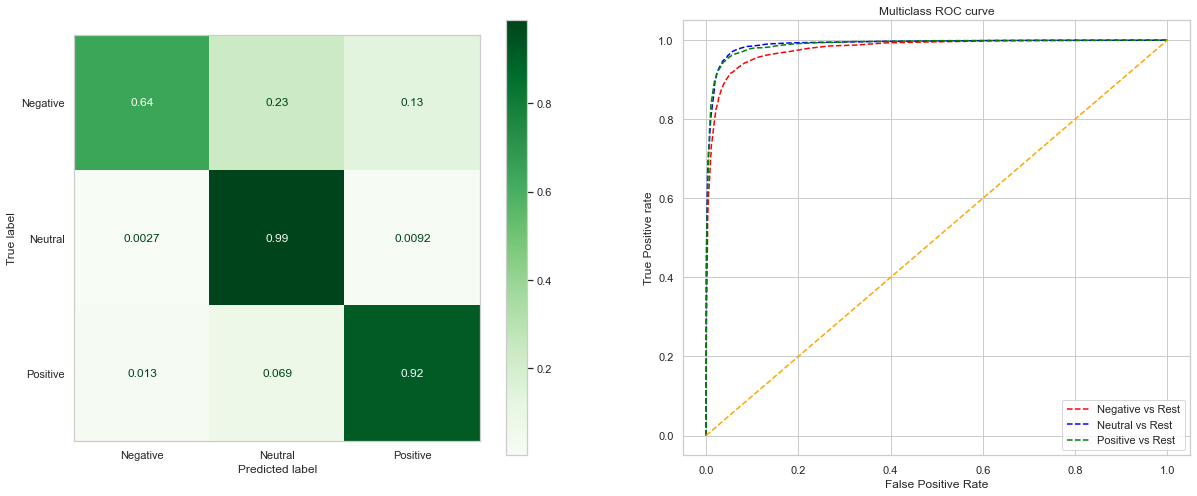

In [118]:
base_rf_clf = Pipeline([('tfidf', TfidfVectorizer()),
                        ('base_rf_clf', RandomForestClassifier(random_state=42))])

base_rf_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = base_rf_clf.predict(X_test)
multiclass_evaluation(y_test, y_pred, X_test, X_train, base_rf_clf)

For class 0, the precision of 0.92 indicates that when the model predicts class 0, it is correct 92% of the time. The recall of 0.63 suggests that the model captures only 63% of the actual instances of class 0. The F1-score, which balances precision and recall, is 0.75.

For class 1, the model shows high precision (93%), indicating a low false positive rate. The recall of 0.99 suggests that the model captures almost all instances of class 1. The F1-score is 0.96, indicating a robust balance between precision and recall.

Class 2 also has a high precision (93%), indicating a low false positive rate. The recall of 0.92 suggests that the model captures a significant portion of actual instances of class 2. The F1-score is 0.93, indicating a good overall performance.

The average accuracy of 93% indicates the proportion of correctly classified instances across all classes. This indicates that the model has overally performed well.

# Model 4: Complement Naive Bayes

Complement Naive Bayes (CNB) stands out as a modified version of the conventional Naive Bayes (NB) algorithm. Its design makes it particularly effective in handling imbalanced datasets, where there is a significant disparity in the distribution of classes, with one class being more prevalent than the others. CNB is tailored to address the challenges posed by skewed class distributions, making it a valuable choice in scenarios where traditional NB may encounter difficulties due to imbalances in the data.

Training Score: 0.88             Test Score:0.77


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.49      0.54      1364
           1       0.90      0.75      0.82      7402
           2       0.67      0.91      0.77      3987

    accuracy                           0.77     12753
   macro avg       0.72      0.72      0.71     12753
weighted avg       0.79      0.77      0.77     12753



TypeError: 'numpy.ndarray' object is not callable

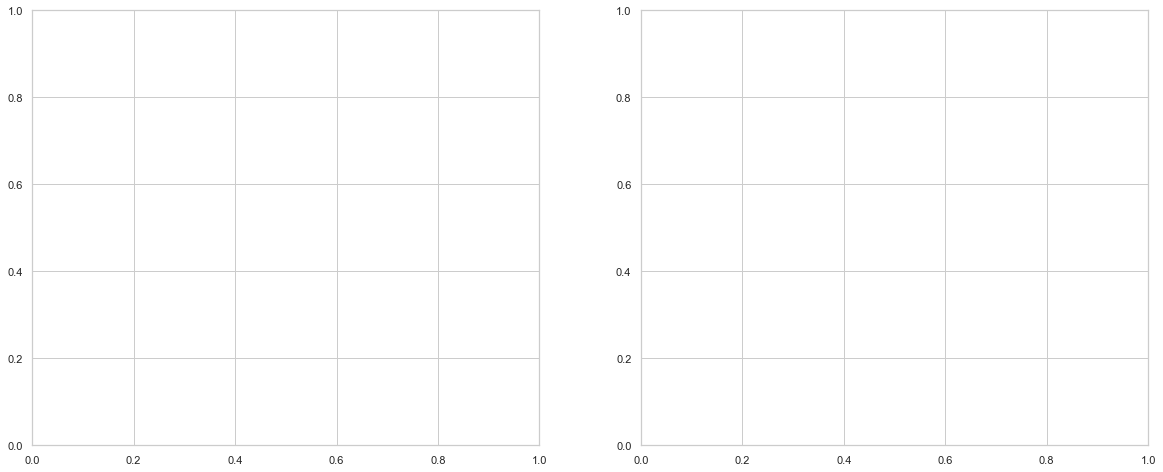

In [120]:
from sklearn.naive_bayes import ComplementNB

base_nb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                        ('base_nb_clf', ComplementNB())])

base_nb_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = base_nb_clf.predict(X_test)
multiclass_evaluation(y_test, y_pred, X_test, X_train, base_nb_clf)

For class 0, a precision of 0.61 indicates that 61% of instances predicted as class 0 were correct, recall of 0.49 suggests that the model is less effective at capturing all instances of class 0 while an F1-score of 0.54 is a balance between precision and recall for class 0.

For class 1, high precision of 0.90 indicates the model's proficiency in correctly identifying class 1 instances and a recall of 0.75 means the model captures a substantial proportion of class 1 instances.

For class 2, a precision of 0.67 shows a moderate ability to accurately predict class 2 instances while a high recall of 0.91 implies the model is excellent at identifying class 2 instances.

The model achieves an overall accuracy of 0.77, correctly predicting class labels for 77% of instances.

# Hyperparameter tuning of the models

### Tuned xgboost Model

In [121]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score


In [122]:
from sklearn.model_selection import RandomizedSearchCV
# Instantiating the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Defining a smaller parameter grid to minimize runtime
param_dist = {
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [50, 100]
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective='multi:softmax', num_class=3),
                                   param_distributions=param_dist,
                                   scoring='accuracy',
                                   cv=3,
                                   n_iter=5,
                                   verbose=2,
                                   n_jobs=-1)
random_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Use the best model to make predictions on the test set
random_search_pred = best_model.predict(X_test_tfidf)

# Evaluate the performance of the best model
print("Best Parameters:", best_params)
print('--------------------------------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, random_search_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
--------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.36      0.51      1364
           1       0.79      1.00      0.88      7402
           2       0.97      0.69      0.81      3987

    accuracy                           0.83     12753
   macro avg       0.87      0.68      0.73     12753
weighted avg       0.85      0.83      0.82     12753



The tuned model has not shown any improvement in performance as compared to the baseline model. For class 0, the model has a precision of 0.84, meaning that when it predicts class 0, it is correct 84% of the time. The recall is 0.40, indicating that the model is capturing only 40% of the instances of class 0. The F1-score, which balances precision and recall, is 0.54.

For class 1, the model's precision score has reduced to 0.80, suggesting that when it predicts class 1, it is correct 80% of the time. The recall is very high at 1.00, indicating that the model is capturing all instances of class 1. The F1-score is also high at 0.89.

For class 2, the model exhibits a high precision of 0.96, indicating that when it predicts class 2, it is correct 96% of the time. The recall is 0.69, suggesting that the model captures 69% of the instances of class 2. The F1-score is 0.80. The model's average accuracy has reduced to 0.84(84%). This means the tuned XGboost model correctly predicted the class labels for 84% of the instances in the dataset.

### Tuned Logistic Regression model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Score: 1.0             Test Score:0.97


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1364
           1       0.97      0.99      0.98      7402
           2       0.97      0.96      0.97      3987

    accuracy                           0.97     12753
   macro avg       0.96      0.94      0.95     12753
weighted avg       0.97      0.97      0.97     12753



TypeError: 'numpy.ndarray' object is not callable

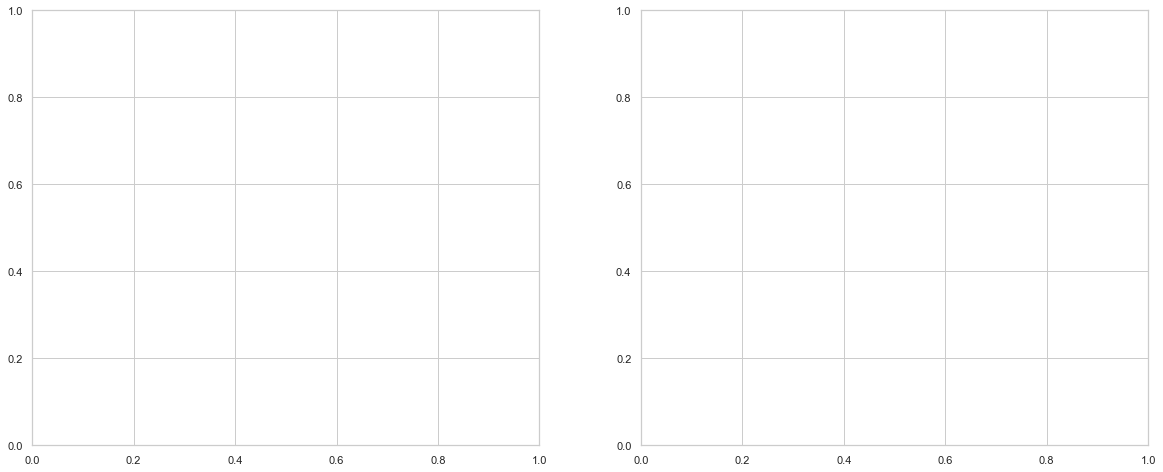

In [123]:
# Defining the pipeline
tuned_log_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('tuned_log_clf', LogisticRegression())
])

# Defining the parameter grid for tuning
param_grid = {
    'tuned_log_clf__C': [0.01, 0.1, 1, 10, 100],
    'tuned_log_clf__penalty': ['l1', 'l2'],
    'tuned_log_clf__solver': ['liblinear']
}

# Creating the GridSearchCV object
tuned_log_clf_CV = GridSearchCV(tuned_log_clf, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fitting the model
tuned_log_clf_CV.fit(X_train, y_train)

# Making predictions on the test set
y_pred = tuned_log_clf_CV.predict(X_test)

# Performing evaluation 
multiclass_evaluation(y_test, y_pred, X_test, X_train, tuned_log_clf_CV)

The tuned model has significantly improved the performance of the model. For class zero, the precision of 0.92 indicates that when the model predicts class 0, it is correct 92% of the time. The recall of 0.88 suggests that the model captures 88% of the actual instances of class 0. The F1-score, which balances precision and recall, is 0.90

For class 1, the model shows high precision (97%), indicating a low false positive rate. The recall of 0.99 suggests that the model captures almost all instances of class 1. The F1-score is 0.98, indicating a very robust balance between precision and recall.

Class 2 has a high precision (97%), also indicating a low false positive rate. The recall of 0.96 suggests that the model captures a significant portion of actual instances of class 2. The F1-score is 0.97, indicating a good overall performance.

The overal accuracy of 97% indicates the proportion of correctly classified instances across all classes. It provides a general overview of the model's performance.

### Tuned Random Forest model

In [ ]:
# Define the pipeline with the RandomForestClassifier
tuned_rf_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('tuned_rf_clf', RandomForestClassifier(random_state=42))
])

# Define a smaller parameter grid for quicker search
param_grid = {
    'tuned_rf_clf__n_estimators': [50, 100],
    'tuned_rf_clf__max_depth': [None, 10],
    'tuned_rf_clf__min_samples_split': [2, 5],
    'tuned_rf_clf__min_samples_leaf': [1, 2]
}

# Use a smaller number of cross-validation folds
cv_folds = 3

# Create the GridSearchCV object
tuned_rf_clf_CV = GridSearchCV(tuned_rf_clf, param_grid, cv=cv_folds, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit the model
tuned_rf_clf_CV.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", tuned_rf_clf_CV.best_params_)

# Make predictions on the test set using the best model
y_pred = tuned_rf_clf_CV.predict(X_test)

# Perform evaluation 
multiclass_evaluation(y_test, y_pred, X_test, X_train, tuned_rf_clf_CV)

The results shows that after tuning the model, its performance has improved for class zero(0) and remained the same for classes 1 and 2. For class 0, the precision of 0.93 indicates that when the model predicts class 0, it is correct 93% of the time. The recall of 0.64 suggests that the model captures only 64% of the actual instances of class 0. The F1-score, which balances precision and recall, is 0.75.

For class 1, the model shows high precision (93%), indicating a low false positive rate. The recall of 0.99 suggests that the model captures almost all instances of class 1. The F1-score is 0.96, indicating a robust balance between precision and recall.

Class 2 also has a high precision (93%), indicating a low false positive rate. The recall of 0.92 suggests that the model captures a significant portion of actual instances of class 2. The F1-score is 0.93, indicating a good overall performance.

The average accuracy of 93% indicates the proportion of correctly classified instances across all classes. This indicates that the model has overally performed well.

### Tuned Complement Naive Bayes

In [ ]:
# Defining the pipeline with the Complement Naive Bayes classifier
tuned_nb_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('tuned_nb_clf', ComplementNB())
])

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'tuned_nb_clf__alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'tuned_nb_clf__fit_prior': [True, False]
}

# Creating the GridSearchCV object
tuned_nb_clf_CV = GridSearchCV(tuned_nb_clf, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fitting the model
tuned_nb_clf_CV.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", tuned_nb_clf_CV.best_params_)

# Make predictions on the test set using the best model
y_pred = tuned_# Save the model
joblib.dumpnb_clf_CV.predict(X_test)

# Perform evaluation 
multiclass_evaluation(y_test, y_pred, X_test, X_train, tuned_nb_clf_CV)

After tuning the model, its perfornace has improved on some metrics and dropped on others. For class 0, a precision of 0.61 indicates that 61% of instances predicted as class 0 were correct, recall of 0.37 suggests that the model is less effective at capturing all instances of class 0 while an F1-score of 0.46 is a balance between precision and recall for class 0.

For class 1, high precision of 0.88 indicates the model's proficiency in correctly identifying class 1 instances and a recall of 0.79 means the model captures a substantial proportion of class 1 instances.

For class 2, a precision of 0.68 shows a moderate ability to accurately predict class 2 instances while a high recall of 0.90 implies the model is excellent at identifying class 2 instances.

The model achieves an overall accuracy of 0.78, correctly predicting class labels for 78% of instances.

In [127]:
!pip install streamlit

     ---------------------------------------- 4.8/4.8 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 82.0/82.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 8.4/8.4 MB 974.0 kB/s eta 0:00:00
   ---------------------------------------- 996.9/996.9 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 196.4/196.4 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 413.4/413.4 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 24.9/24.9 MB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 62.6/62.6 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 240.6/240.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 99.6/99.6 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 87.5/87.5 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 1.2/1.2 MB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.24.4 which is incompatible.


In [126]:
import joblib

# Save the model
joblib.dump(xgb_model,'best_model.pkl')

['best_model.pkl']

In [130]:
import plotly
print(plotly.__version__)

# import pickle
# pickle_in = open("best_model.pkl", "wb")
# pickle.dump(xgb_model,pickle_in)
# pickle_in.close

4.11.0
